<a href="https://colab.research.google.com/github/MiladQolami/BasicNeuralDataAnalysis/blob/main/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basics of Spike Train visualization**

### Experimental set-up

---
<details>
<summary> <font color='green'>Click here for the context of experimental set-up</font></summary>

#### Most of the times we recognize objects around us instantly and without any apparent effort. **Object recognition** is a fundamental ability of our visual system. **Inferior temporal (IT)** cortex is an imporatant part of ventral visual (occipitotemporal) pathway which is thought to be responsible for object recognition. Neurons in IT cortex are highly responsive to complex objects but not to primary visual stimuli such as gratings or edges. Therefore complex objects are common visual stimuli in studies of IT cortex. IT neurons have different response characteristics, for example some of them respond to different objects almost equally but others are more selective to specific objects such as faces or bodies.

#### In this experiment we have recorded from an IT neuron to evaluate its reponse to presentation of different complex objects and to see whether the neuron is selective to any specific object for example human face or not.

<br>
<p align='center'>
<img src="https://github.com/MiladQolami/BasicNeuralDataAnalysis/blob/main/SpikeTrianVisualization/Ventral%20visual%20pathway.jpg?raw=1">



#### The data used in this notebook is a single session of extracellular recording from a Macaque monkey's inferiotemporal cortex.The monkey was passively viewing a display while face and non-face images were presented in **rapid serial visual presentation (RSVP)** set-up. During this sessoin 155 unique images were presented 5 times.

<img src="https://github.com/MiladQolami/BasicNeuralDataAnalysis/blob/main/SpikeTrianVisualization/Python/Paradigm%20copy.jpg?raw=1">

### Loadng data, importing packages and defining initial parameters


In [2]:
!git clone https://github.com/MiladQolami/BasicNeuralDataAnalysis
!ls

Cloning into 'BasicNeuralDataAnalysis'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 195 (delta 38), reused 3 (delta 1), pack-reused 127
Receiving objects: 100% (195/195), 1.45 MiB | 1.80 MiB/s, done.
Resolving deltas: 100% (72/72), done.
BasicNeuralDataAnalysis  sample_data


In [1]:
import matplotlib.pyplot as plt # imprort pyplot submodule from matplotlib
import numpy as np
import scipy.io as sio
from scipy.signal import savgol_filter
import pandas as pd
import ipywidgets as widgets
%matplotlib inline


In [4]:
# Set defualt parameters

plt.rcParams['figure.figsize'] = [20, 4]
plt.rcParams['font.size'] = 12
# rcParams['axes.spines.top'] = False
# rcParams['axes.spines.right'] = False
# rcParams['figure.autolayout'] = True

In [5]:
spike_data = sio.loadmat('BasicNeuralDataAnalysis/SpikeTrianVisualization/SpikesIT.mat')


type(spike_data)
spike_data.keys()
spikes = spike_data['Spikes']
stim_tags = spike_data['stim_tags']
trial_idx = spike_data['trial_idx']
trial_num = np.shape(spikes)[0]
trial_length = 1000
time_vector = np.arange(start = -200,stop = 800)
stimulus_length = 300

Now, our spikes are stored in the variable `spikes` which is a 2D array of size 1550 x 1000. The variable `trial_idx` indicates which specific image was presented during each trial. Different stimuli (images) are taged by a number between 1 to 155 and since each image was presented 10 times `trial_idx` consists of 155x10=1550 tags. The last variable is named `stimulus_tags` which helps us to know which images are face and which are non-face. It is a 2D array of size 155 x 2. The first column is imges tags and the second consists of 1s (for face) and 0s (for non-face) 

### **Raster plot**
#### To visualize spikes during a trial and compare them between different trials we use raster plots. In this type of plot x-axis represents time and the y-axis represents trial number in which spikes are shown by vertical lines at time points that have happened.
<br>
<p align='center'>
<img src= "https://github.com/MiladQolami/BasicNeuralDataAnalysis/blob/main/SpikeTrianVisualization/Raster%20plot.png?raw=1" width="400" height= "300">



#### A single raster 

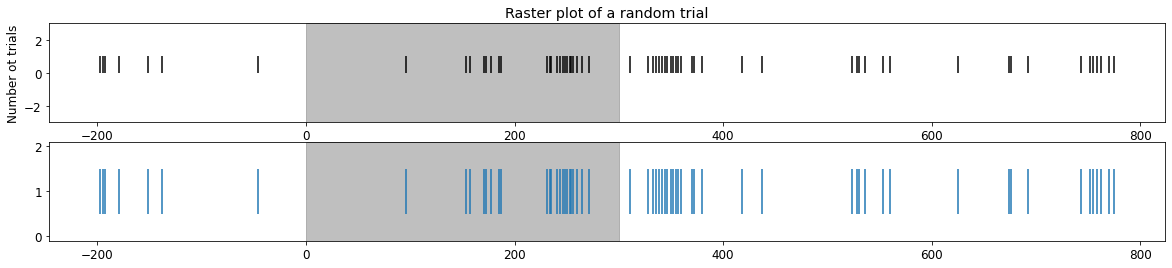

In [6]:
np.random.seed(2023)
RandomTrial = np.random.randint(trial_num)
fig,ax = plt.subplots(2,1)
ax[0].vlines(np.argwhere(spikes[RandomTrial,:])-200,0,1)
ax[1].eventplot(np.argwhere(spikes[RandomTrial,:]).flatten() -200)
ax[0].axvspan(0,300,color = 'gray',alpha=.5)
ax[1].axvspan(0,300,color = 'gray',alpha=.5)
ax[0].set(ylim=[-3,3],xlabel='Time(ms)',ylabel = "Number ot trials",title='Raster plot of a random trial')
plt.show()

  #### Raster of all trials


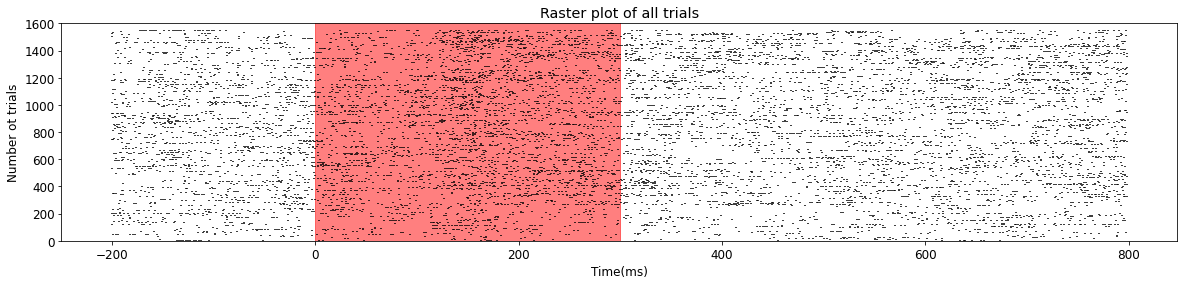

In [7]:
# Version 1: more flexible
fig, ax = plt.subplots()
for trial_i in range(trial_num):
  ax.vlines(np.argwhere(spikes[trial_i,:])-200,trial_i,trial_i +1)

ax.axvspan(0,300,0,1600,color = 'red',alpha=.5)
ax.set(ylim=[0,1600],xlabel='Time(ms)',ylabel = "Number ot trials",title='Raster plot of all trials')
plt.show()


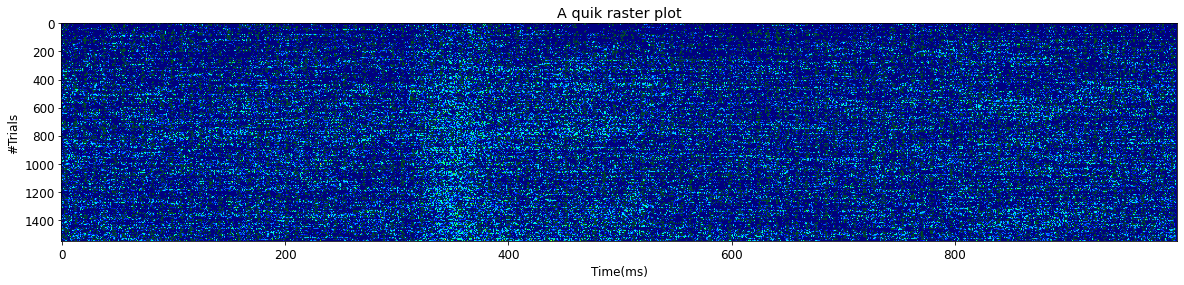

In [8]:
# Version 2: quiker 
fig, ax = plt.subplots()
ax.imshow(spikes,cmap='gist_ncar',aspect = 'auto')
ax.set(xlabel = 'Time(ms)', ylabel = '#Trials',title = 'A quik raster plot')
plt.show()

#### **Seperating trials into two conditions**
#### In many experiments we want to compare two or more conditions with eachother. In this case we want to compare trials which a face images were presented with those which a non-face image was presented. 

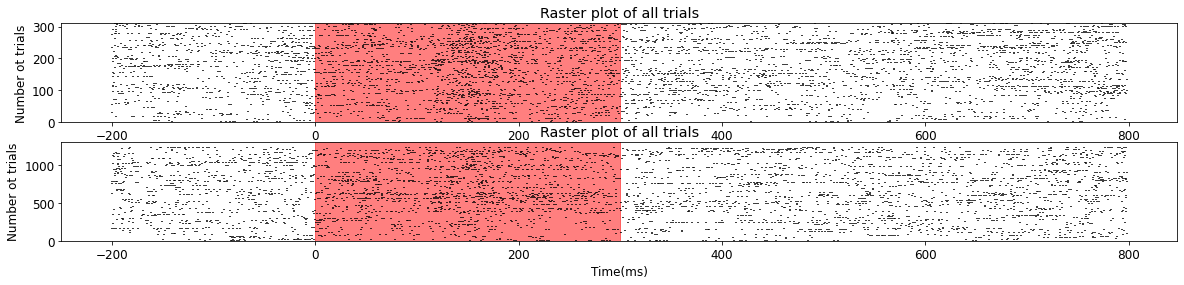

In [9]:

# Seperating stimulus tags
face_stim = stim_tags[stim_tags[:,1]==1][:,0].T
non_face_stim = stim_tags[stim_tags[:,1]==0][:,0]

# Seperating spikes of two conditions
face_trials = np.zeros([1,trial_num])
for i,val in enumerate(face_stim):
  a = (val == trial_idx[0,:])
  face_trials = np.logical_or(face_trials, a )
face_spikes = spikes[face_trials.flatten(),:]

non_face_trials = np.zeros([1,trial_num])
for i,val in enumerate(non_face_stim):
  a = (val == trial_idx[0,:])
  non_face_trials = np.logical_or(non_face_trials, a )
non_face_spikes = spikes[non_face_trials.flatten(),:]


fig,ax = plt.subplots(2,1)
for trial_i in range(face_spikes.shape[0]):
  ax[0].vlines(np.argwhere(face_spikes[trial_i,:])-200,trial_i,trial_i +1)

ax[0].axvspan(0,300,0,310,color = 'red',alpha=.5)
ax[0].set(ylim=[0,310],xlabel='Time(ms)',ylabel = "Number ot trials",title='Raster plot of all trials')


for trial_i in range(non_face_spikes.shape[0]):
  ax[1].vlines(np.argwhere(non_face_spikes[trial_i,:])-200,trial_i,trial_i +1)

ax[1].axvspan(0,300,0,1300,color = 'red',alpha=.5)
ax[1].set(ylim=[0,1300],xlabel='Time(ms)',ylabel = "Number ot trials",title='Raster plot of all trials')
plt.show()



### **Peri Stimulus Time Histogram (PSTH)**

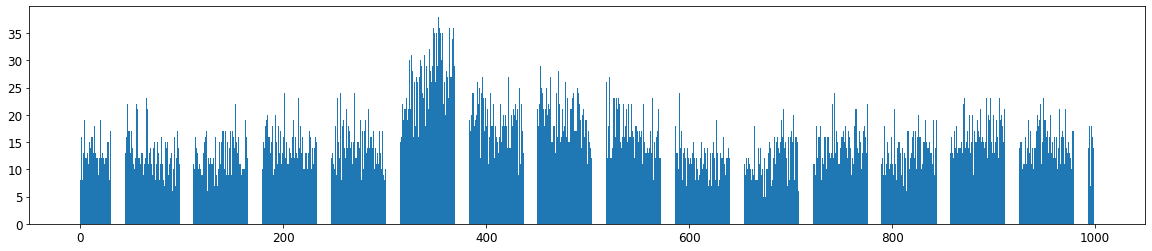

In [10]:
# Taking sum of face trials at each time point
sum_face = (np.sum(face_spikes,0))

# drawing a bar plot
plt.bar(range(1000),sum_face)
plt.show()

#### In order to get a more robust result we usually devide our time vector into discrete time bins and we count number of spikes that fall into that those time bin and then we show those counts with bars in bar plot. Lets see how this is done.

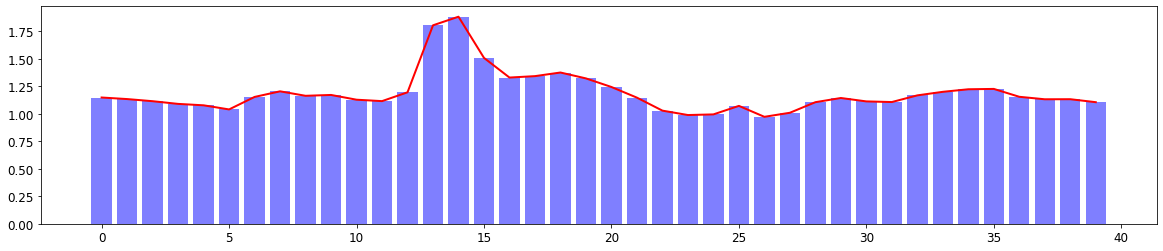

In [11]:
bin_size = 25
binned_spiekes = np.empty([trial_num,int(trial_length/bin_size)])
for trial_i in range(trial_num):
  hist,_ = np.histogram(np.argwhere(spikes[trial_i,:]),bins = np.arange(start = 0,stop = trial_length +bin_size, step = bin_size))
  binned_spiekes[trial_i,:] = hist

fig,ax = plt.subplots()
ax.bar(range(len(hist)),binned_spiekes.mean(0),color = 'b',alpha = .5)
ax.plot(binned_spiekes.mean(0),'red',lineWidth = 2)
plt.show()



#### Create a widget for showing PSTH of two conditions with sliding bin size

In [60]:
# @title Interactive PSTH


@widgets.interact(Bin_size = widgets.SelectionSlider(options = [1,10,25,50,100]))

def binning_spikes(Bin_size):
  binned_face_spikes = np.empty([face_spikes.shape[0],int(face_spikes.shape[1]/Bin_size)])
  for trial_i in range(face_spikes.shape[0]):
    histi,_ = np.histogram(np.argwhere(face_spikes[trial_i,:]),bins = np.arange(start = 0,stop = trial_length +Bin_size, step = Bin_size))
    binned_face_spikes[trial_i,:] = histi
  binned_non_face_spikes = np.empty([non_face_spikes.shape[0],int(face_spikes.shape[1]/Bin_size)])
  for trial_j in range(non_face_spikes.shape[0]):
    histj,_ = np.histogram(np.argwhere(non_face_spikes[trial_j,:]),bins = np.arange(start = 0,stop = trial_length +Bin_size, step = Bin_size))
    binned_non_face_spikes[trial_j,:] = histj

  fig,ax = plt.subplots(1,2)
  ax[0].bar(range(binned_face_spikes.shape[1]),binned_face_spikes.mean(0),color = 'b',alpha = .5)
  ax[1].bar(range(binned_non_face_spikes.shape[1]),binned_non_face_spikes.mean(0),color = 'b',alpha = .5)
  ax[0].axvspan(200/Bin_size,500/Bin_size,0,np.max(binned_face_spikes.mean(0))*10,color = 'green',alpha=.3)
  ax[1].axvspan(200/Bin_size,500/Bin_size,0,np.max(binned_face_spikes.mean(0))*10,color = 'green',alpha=.3)
  plt.setp(ax,ylim = [0,np.max(binned_face_spikes.mean(0))*1.1],xlabel = 'Time bins',ylabel = 'Average firing rate')
  plt.show()




interactive(children=(SelectionSlider(description='Bin_size', options=(1, 10, 25, 50, 100), value=1), Output()…

#### **Adding Standard Error of Mean (SEM) PSTH curve**
#### When we plot average of a sample of a vriable it would be much more insightfull to add a prameter that show the variablity of the data. SEM shows the variablity of mean if we repeat sampling.


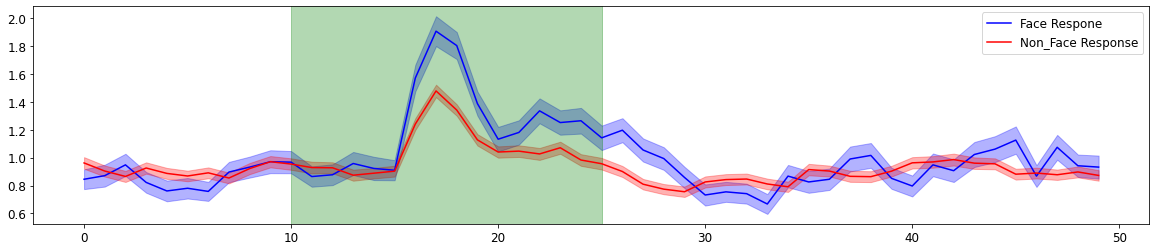

In [113]:
# First binning the spikes of two conditions again 
def binning_spikes(Bin_size):
  binned_face_spikes = np.empty([face_spikes.shape[0],int(face_spikes.shape[1]/Bin_size)])
  for trial_i in range(face_spikes.shape[0]):
    histi,_ = np.histogram(np.argwhere(face_spikes[trial_i,:]),bins = np.arange(start = 0,stop = trial_length +Bin_size, step = Bin_size))
    binned_face_spikes[trial_i,:] = histi
  binned_non_face_spikes = np.empty([non_face_spikes.shape[0],int(face_spikes.shape[1]/Bin_size)])
  for trial_j in range(non_face_spikes.shape[0]):
    histj,_ = np.histogram(np.argwhere(non_face_spikes[trial_j,:]),bins = np.arange(start = 0,stop = trial_length +Bin_size, step = Bin_size))
    binned_non_face_spikes[trial_j,:] = histj
  return binned_face_spikes,binned_non_face_spikes

Bin_size = 20

binned_face_spikes,binned_non_face_spikes = binning_spikes(Bin_size)

face_resp = binned_face_spikes.mean(0)
non_face_resp = binned_non_face_spikes.mean(0)
# Culculating Standard Error of Mean (SEM) 
face_SEM = np.std(binned_face_spikes,0) / np.sqrt(binned_face_spikes.shape[0])
non_face_SEM = np.std(binned_non_face_spikes,0) / np.sqrt(binned_non_face_spikes.shape[0])

fig,ax = plt.subplots()
ax.plot(face_resp,color = 'b',label = 'Face Respone')
ax.fill_between(np.arange(len(face_resp)), face_resp+face_SEM,face_resp-face_SEM,color = 'b',alpha = .3)
ax.plot(non_face_resp,color = 'r',label = 'Non_Face Response')
ax.fill_between(np.arange(len(non_face_resp)), non_face_resp+non_face_SEM,non_face_resp-non_face_SEM,color = 'r',alpha = .3)
ax.axvspan(200/Bin_size,500/Bin_size,0,np.max(binned_face_spikes.mean(0))*10,color = 'green',alpha=.3)
plt.legend(loc="upper right")
plt.show()
